# Import relevant libraries/modules etc

In [2]:
import numpy as np
import xarray as xr
import rasterio
%matplotlib inline
from matplotlib.pyplot import *
from glob import glob
import os
import datetime
import pandas as pd
from rasterio_to_xarray import rasterio_to_xarray, xarray_to_rasterio
import rasterstats

# Read NetCDF files in to create dataset with all data in

In [3]:
PM25 = xr.open_mfdataset(r'D:\MAIAC_Data\Europe\h00v01\nc_monthly\*PM25.nc', chunks={'time':2, 'x':500, 'y':500}, concat_dim='time')

In [4]:
PM25['data'].time.min()

<xarray.DataArray 'time' ()>
dask.array<amin-ag..., shape=(), dtype=datetime64[ns], chunksize=()>

# Extract data over one pixel

In [4]:
ts = PM25['data'].isel(x=500, y=500)

In [5]:
ts

<xarray.DataArray 'data' (time: 26186)>
dask.array<getitem..., shape=(26186,), dtype=float32, chunksize=(10,)>
Coordinates:
    x        float64 -3.194e+05
    y        float64 8.01e+05
  * time     (time) datetime64[ns] 2000-10-01T10:35:00 2000-10-01T12:10:00 ...
Attributes:
    crs: +init=epsg:27700
    affine: [ -9.47639631e+05   1.25654304e+03   0.00000000e+00   1.42927781e+06
   0.00000000e+00  -1.25654304e+03]

In [5]:
result = ts.load()

In [14]:
result = result.to_dataframe()

AttributeError: 'DataFrame' object has no attribute 'to_dataframe'

In [16]:
result.dropna()

,x,y,data
time,,,
2000-11-21 12:40:00,-319368.108463,801006.289961,1.239798
2000-12-30 12:45:00,-319368.108463,801006.289961,0.972356
2000-02-29 12:05:00,-319368.108463,801006.289961,9.289075
2000-03-03 12:35:00,-319368.108463,801006.289961,0.552974
2000-03-24 11:20:00,-319368.108463,801006.289961,0.750465
2000-03-27 13:25:00,-319368.108463,801006.289961,0.750465
2000-03-31 13:00:00,-319368.108463,801006.289961,0.750465
2000-04-09 12:55:00,-319368.108463,801006.289961,0.718036
2000-04-30 11:35:00,-319368.108463,801006.289961,0.718036


# Group data
- merge multiple images per day using the maximum AOT estimates

In [5]:
PM25.time

<xarray.DataArray 'time' (time: 26186)>
dask.array<concate..., shape=(26186,), dtype=datetime64[ns], chunksize=(10,)>
Coordinates:
  * time     (time) datetime64[ns] 2000-10-01T10:35:00 2000-10-01T12:10:00 ...

In [10]:
Daily_PM25 = PM25.resample('D', dim='time', how='median')

In [11]:
Daily_PM25.time

<xarray.DataArray 'time' (time: 5059)>
array(['2000-03-01T00:00:00.000000000', '2000-03-02T00:00:00.000000000',
       '2000-03-03T00:00:00.000000000', ...,
       '2014-01-03T00:00:00.000000000', '2014-01-04T00:00:00.000000000',
       '2014-01-05T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-03-01 2000-03-02 2000-03-03 ...

In [16]:
Daily_PM25.attrs

OrderedDict([('crs', '+init=epsg:27700'),
             ('affine',
              (-947639.6305106478,
               1256.5430440955893,
               0.0,
               1429277.8120091767,
               0.0,
               -1256.5430440955893))])

# Analysis
## overall average of every pixel

In [6]:
overall_mean = AOT.mean(dim='time', keep_attrs=True)

In [7]:
overall_mean.attrs

OrderedDict()

In [8]:
figure(figsize=(20, 12))
overall_mean.plot(robust=True)

AttributeError: 'Dataset' object has no attribute 'plot'

In [13]:
xarray_to_rasterio(overall_mean, r'D:\Annies_Dissertation\MAIAC_Test\Projected\2014\overall_mean_out.tif')

## Averages
### Monthly

In [15]:
monthly = PM25.groupby('time.month').max(dim='time')

In [16]:
monthly.coords

Coordinates:
  * x        (x) float64 -9.476e+05 -9.464e+05 -9.451e+05 -9.439e+05 ...
  * y        (y) float64 1.429e+06 1.428e+06 1.427e+06 1.426e+06 1.424e+06 ...
  * month    (month) int64 1 3

In [18]:
monthly.attrs

OrderedDict([('crs', '+init=epsg:27700'),
             ('affine',
              (-947639.6305106478,
               1256.5430440955893,
               0.0,
               1429277.8120091767,
               0.0,
               -1256.5430440955893))])

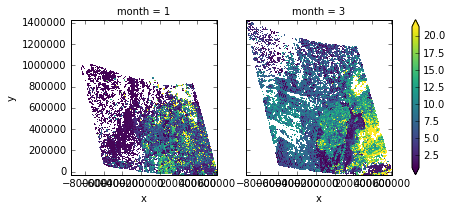

In [19]:
figure(figsize=(20, 12))
monthly.plot(col='month', robust=True)

### Seasonal

In [20]:
seasonal = PM25.groupby('time.season').max(dim='time')

In [21]:
seasonal.coords

Coordinates:
  * x        (x) float64 -9.476e+05 -9.464e+05 -9.451e+05 -9.439e+05 ...
  * y        (y) float64 1.429e+06 1.428e+06 1.427e+06 1.426e+06 1.424e+06 ...
  * season   (season) object 'DJF' 'MAM'

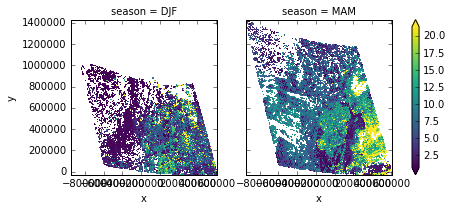

In [22]:
figure(figsize=(20, 12))
seasonal.plot(col='season', robust=True)

### Yearly

In [10]:
yearly = PM25.groupby('time.year').max(dim='time')

In [11]:
yearly.coords

Coordinates:
  * x        (x) float64 -9.476e+05 -9.464e+05 -9.451e+05 -9.439e+05 ...
  * y        (y) float64 1.429e+06 1.428e+06 1.427e+06 1.426e+06 1.424e+06 ...
  * year     (year) int64 2000 2012 2013 2014

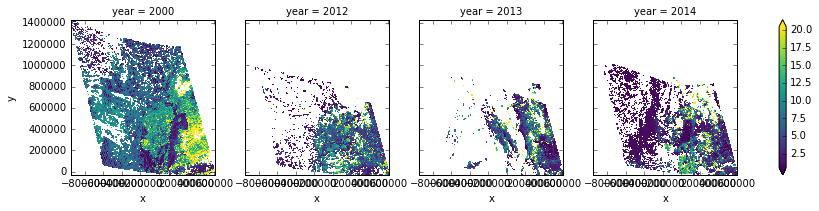

In [25]:
figure(figsize=(20, 12))
yearly.plot(col='year', robust=True)

## Standard deviation of AP for each pixel over time- not currently what i want to do!

In [32]:
std = PM25.groupby('time.year').std(dim = 'time')

In [33]:
std.coords

Coordinates:
  * x        (x) float64 -9.476e+05 -9.464e+05 -9.451e+05 -9.439e+05 ...
  * y        (y) float64 1.429e+06 1.428e+06 1.427e+06 1.426e+06 1.424e+06 ...
  * year     (year) int64 2000 2012 2013 2014

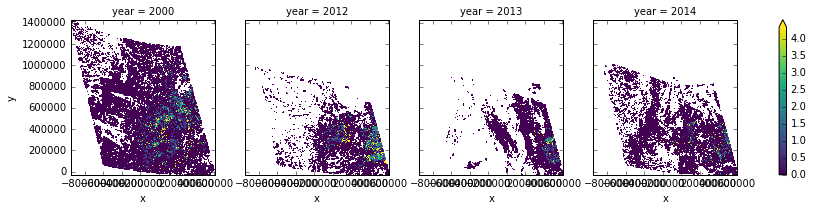

In [36]:
figure(figsize=(20, 12))
std.plot(col='year', robust=True)

# Count of values that aren't missing

In [30]:
observations = PM25.count(dim='time')

(array([  1.24362400e+06,   8.82780000e+04,   4.74370000e+04,
          2.85240000e+04,   1.67750000e+04,   9.42100000e+03,
          4.58400000e+03,   1.69400000e+03,   4.60000000e+02,
          8.30000000e+01]),
 array([  0. ,   1.1,   2.2,   3.3,   4.4,   5.5,   6.6,   7.7,   8.8,
          9.9,  11. ]),
 <a list of 10 Patch objects>)

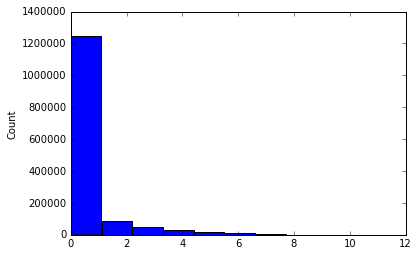

In [31]:
observations.plot.hist()

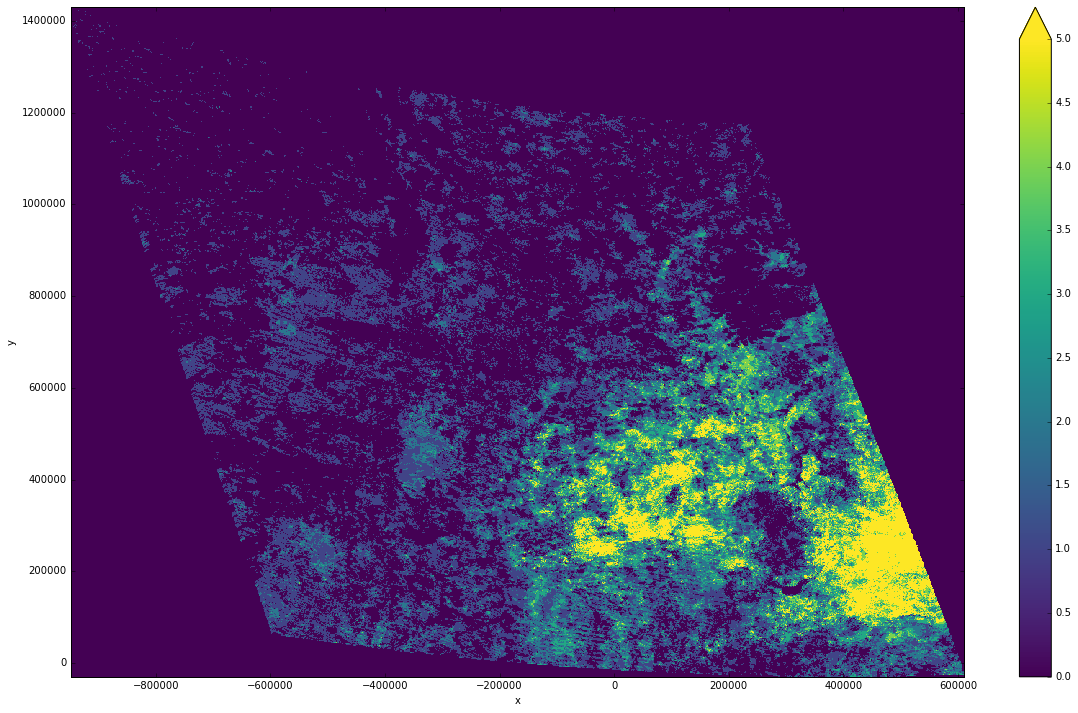

In [32]:
figure(figsize=(20, 12))
observations.plot(robust=True)

# Zonal Statistics

In [13]:
from rasterstats import zonal_stats
zonal_stats(r"D:\Annies_Dissertation\Data\LSOA\LSOA.shp", 
            r"D:\Annies_Dissertation\MAIAC_Test\subset\Projected\2014\MAIACAAOT.h00v01.20140041325.hdf_PM25.tif",
            stats="count min mean max median")

D:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3558: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


[{'count': 1, 'max': nan, 'mean': nan, 'median': nan, 'min': nan},
 {'count': 0, 'max': None, 'mean': None, 'median': None, 'min': None},
 {'count': 1, 'max': nan, 'mean': nan, 'median': nan, 'min': nan},
 {'count': 1, 'max': nan, 'mean': nan, 'median': nan, 'min': nan},
 {'count': 0, 'max': None, 'mean': None, 'median': None, 'min': None},
 {'count': 1, 'max': nan, 'mean': nan, 'median': nan, 'min': nan},
 {'count': 0, 'max': None, 'mean': None, 'median': None, 'min': None},
 {'count': 0, 'max': None, 'mean': None, 'median': None, 'min': None},
 {'count': 1, 'max': nan, 'mean': nan, 'median': nan, 'min': nan},
 {'count': 1, 'max': nan, 'mean': nan, 'median': nan, 'min': nan},
 {'count': 0, 'max': None, 'mean': None, 'median': None, 'min': None},
 {'count': 1, 'max': nan, 'mean': nan, 'median': nan, 'min': nan},
 {'count': 0, 'max': None, 'mean': None, 'median': None, 'min': None},
 {'count': 0, 'max': None, 'mean': None, 'median': None, 'min': None},
 {'count': 0, 'max': None, 'mean':

In [ ]:
from rasterstats import zonal_stats
zonal_stats(r"D:\Annies_Dissertation\Data\LSOA\LSOA.shp", 
            r"D:\Annies_Dissertation\MAIAC_Test\subset\Projected\2014\MAIACAAOT.h00v01.20140041325.hdf_PM25.tif",
            stats="count min mean max median", geojson_out=True)